# Nipy
[Let's take a look at what Nipy says about themselves.](https://www.nipy.org).
> Nipy is a community of practice for a whole lot of neuroimaging analysis packages for python and they are beutifully documented and easy (for me to use). If you don't find these utilities easy to use feel free to stick with whatever you use now but hopefully with a little introduction these tools can give you the freedom to do a few things more easily and more reproducibly then you otherwise might.
> Many of these packages are also designed to "play nice" with a cariety of other packages in the python sientific eco-system (in particular nilearn and sklearn)
> These packages include:
[Nibabel](https://nipy.org/nibabel/).
[Nilearn](https://nilearn.github.io/).
[Nipype](https://nipype.readthedocs.io/en/latest/).
[PyMVPA](http://www.pymvpa.org/).
[Niwidgets](https://nipy.org/niwidgets/).


## Let's manipulate some images:
> This isn't in BIDS format because I'm lazy and did this quickly but hopefully the organization here makes some sense. You should have a bunch of 'raw' single trial images across 4 runs for participant 111. These are 'high-res' images that we need to put together in order.

In [1]:
import os
print("Here's everything we got",os.listdir('.'))
os.chdir('..')
print(os.listdir('.'))

("Here's everything we got", ['.git', 'How to make some masks.ipynb', '.ipynb_checkpoints', 'MK_data_files.ipynb', 'Accuracy.png', 'random', 'Some nipy utilities.ipynb', 'MVPA.ipynb', 'gitupdate.sh'])
['code', 'sub-111', 'raw-111']


# Let's go get all of our files
> This is just done for one participant but this code would be readily changable for multiple participants

> In the end we want a list or array with all of the files that we want in the order that we want them in this case run 1 trial (1,2,3,4...), run 2 trial (1,2,3,4...) etc

In [12]:
import numpy as np
import re
import pandas as pd

sub_files=[]
sub='sub-111'
mr_input='raw-111'
for root, dirs, files in os.walk(os.path.abspath(mr_input)):
    for file in files:
        sub_files.append(os.path.join(root, file))
sub_files.sort()
display(sub_files)

['/home/strange_lorenz/Desktop/wkshp/raw-111/Stats1_run1_2mm_trialbytrial.feat/stats/ztrial01.nii.gz',
 '/home/strange_lorenz/Desktop/wkshp/raw-111/Stats1_run1_2mm_trialbytrial.feat/stats/ztrial02.nii.gz',
 '/home/strange_lorenz/Desktop/wkshp/raw-111/Stats1_run1_2mm_trialbytrial.feat/stats/ztrial03.nii.gz',
 '/home/strange_lorenz/Desktop/wkshp/raw-111/Stats1_run1_2mm_trialbytrial.feat/stats/ztrial04.nii.gz',
 '/home/strange_lorenz/Desktop/wkshp/raw-111/Stats1_run1_2mm_trialbytrial.feat/stats/ztrial05.nii.gz',
 '/home/strange_lorenz/Desktop/wkshp/raw-111/Stats1_run1_2mm_trialbytrial.feat/stats/ztrial06.nii.gz',
 '/home/strange_lorenz/Desktop/wkshp/raw-111/Stats1_run1_2mm_trialbytrial.feat/stats/ztrial07.nii.gz',
 '/home/strange_lorenz/Desktop/wkshp/raw-111/Stats1_run1_2mm_trialbytrial.feat/stats/ztrial08.nii.gz',
 '/home/strange_lorenz/Desktop/wkshp/raw-111/Stats1_run1_2mm_trialbytrial.feat/stats/ztrial09.nii.gz',
 '/home/strange_lorenz/Desktop/wkshp/raw-111/Stats1_run1_2mm_trialbytrial

# Turn this list of files into a single image
>

In [16]:
import nilearn.image as image
sub_out='sub-111'
np.savetxt(sub_out+'/sub-'+sub+'_mrfiles.csv',
           sub_files,
           delimiter='\t',
           fmt='%s')
    
full_image=image.load_img(sub_files)
    
func_img_name=sub_out+'/'+sub+'_func.nii.gz'
print(func_img_name)
full_image.to_filename(func_img_name)


sub-111/sub-111_func.nii.gz


# Let's make masks from wierd atlases

In Vivo High Resolution Atlas of the Subcortical Human Brain


Notes
-----
The purpose of this project is to develop a crowd-sourced In Vivo High Resolution Atlas of the Subcortical Human Brain. 
We invite contributions to this project, both to increase the precision of anatomical labels, and to increase the number of labeled subcortical nuclei.

This resource can be used as a reference atlas for researchers and students alike.

Content
-------
    :'maps': Nifti images with the (probabilistic) region definitions
    :'labels': text file containing the file names

References
----------
For more information about this dataset:
https://osf.io/r2hvk/

Licence: UCC-By Attribution 4.0 International

 The areas in the pauli 2017 atlas are ['Pu', 'Ca', 'NAC', 'EXA', 'GPe', 'GPi', 'SNc', 'RN', 'SNr', 'PBP', 'VTA', 'VeP', 'HN', 'HTH', 'MN', 'STH']


/home/strange_lorenz/anaconda3/lib/python2.7/site-packages/matplotlib/contour.py:1230: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"
/home/strange_lorenz/anaconda3/lib/python2.7/site-packages/numpy/ma/core.py:2788: UserWarning: Warning: converting a masked element to nan.
  order=order, subok=True, ndmin=ndmin)
/home/strange_lorenz/anaconda3/lib/python2.7/site-packages/matplotlib/contour.py:946: UserWarning: linewidths is ignored by contourf
  warnings.warn('linewidths is ignored by contourf')


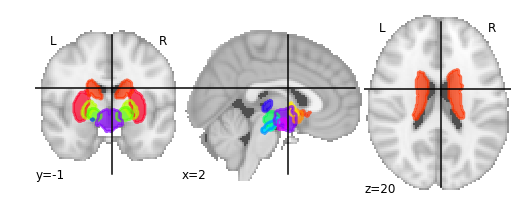

In [24]:
from nilearn import datasets, image, masking, plotting, input_data
import matplotlib.pyplot as plt

func=full_image

pauli=datasets.fetch_atlas_pauli_2017()
print(pauli.description)
print(" The areas in the pauli 2017 atlas are %s"%(pauli.labels))

plotting.plot_prob_atlas(pauli.maps)
plt.show()

# Let's apply this mask:
> for shadowing uh-oh we need to resample the mask

TypeError: apply_mask() takes at least 2 arguments (1 given)

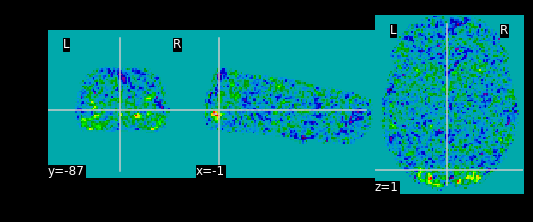

In [37]:
mean_img=image.image.mean_img(func)

plotting.plot_epi(mean_img)

small_mask=masking.compute_background_mask(
    pauli.maps)
plotting.plot_roi(small_mask,mean_img)
plt.show()

masker=input_data.NiftiMasker(mask_img=small_mask)
masked_data=masker.fit_transform(func)


### Let's take a look at our data


In [33]:
display(masked_data)
#re_animate_image=masker.inverse_transform(masked_data)
small_mask=masking.compute_background_mask(image.resample_to_img(pauli.maps,mean_img,interpolation='linear'))
masker=input_data.NiftiMasker(mask_img=small_mask)
masked_data=masker.fit_transform(func)
re_animate_image=masker.inverse_transform(masked_data)



array([[-0.65124756, -0.8664828 , -2.101288  , ..., -0.10281221,
        -1.0898674 , -0.8414751 ],
       [ 1.2833606 ,  1.5272477 , -0.5340645 , ..., -0.30888256,
         0.10788681,  0.1878913 ],
       [ 0.7661408 ,  0.6567704 ,  3.3715966 , ..., -0.7246461 ,
        -1.3377037 ,  1.3794739 ],
       ...,
       [-2.2733867 , -1.4940915 , -0.595724  , ...,  1.2849184 ,
         1.308673  ,  0.882105  ],
       [-0.99290293,  0.71964926,  0.53820384, ...,  1.0506167 ,
         1.5199393 ,  0.7840044 ],
       [ 0.47377264,  0.42479005, -0.224921  , ...,  0.92168593,
         0.14316423, -0.18359679]], dtype=float32)

DimensionError: Input data has incompatible dimensionality: Expected dimension is 3D and you provided a 4D image. See http://nilearn.github.io/manipulating_images/input_output.html.

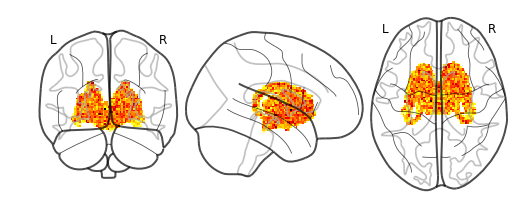

In [36]:
plotting.plot_glass_brain(image.mean_img(re_animate_image))